# Applications of Artificial Intelligence
## Summary Statistics & Visualisations
### Introduction
In this notebook we'll look at an example of a typical process that many will follow for sense-checking data during data ingestion using *summary statistics*, as you did in your first assignment. While this is a sensible step and can alert you to possible issues, it is possible to miss some data problems that a visual inspection would reveal.

### Loading Data
The CSV file `data.csv` contains 13 datasets of X/Y points. The first column contains the dataset ID from 1 to 13, second column contains X coordinates, and third column contains Y coordinates.

Let's use the CSV reading capabilities from `pandas` to load our data into a DataFrame. Remember that a DataFrame is like a `numpy` array, but contains useful additional information such as the names of headers.

In [1]:
import pandas as pd

df = pd.read_csv('data.csv', sep=',')
df

,dataset,x,y
0,1,32.331110,61.411101
1,1,53.421463,26.186880
2,1,63.920202,30.832194
3,1,70.289506,82.533649
4,1,34.118830,45.734551
...,...,...,...
1841,13,39.487200,25.384600
1842,13,91.282100,41.538500
1843,13,50.000000,95.769200
1844,13,47.948700,95.000000


### Data Validation
Suppose we had just loaded a single dataset. Before moving on, we should quickly check the data. We want to ensure nothing went wrong in the data ingestion process, but we also want to start to get a “feel” for the data, and how we might use it. We might want to start to notice correlations or patterns.

As mentioned previously, it would be common practice to check the mean and standard deviation of the data set to sense check that the numbers look correct. Another common practice would be to check the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). This is a measure of the correlation between the X and Y data, where a value of 1 means strong positive correlation, -1 means strong negative correlation, and 0 means no correlation.

Look what happens when we check the summary statistics of the *several* datasets that we loaded:

In [2]:
for i in range(1, 14):
    # select x, y values of rows with column 'dataset' set to i
    dataset = df[df['dataset'] == i][['x', 'y']]
    
    mu = dataset.mean()
    sig = dataset.std()
    r = dataset['x'].corr(dataset['y'])
    
    print(f"The (x, y) mean of dataset {i} is \t\t{mu[0]:.4f}, {mu[1]:.4f}")
    print(f"The (x, y) standard deviation of dataset {i} is \t{sig[0]:.4f}, {sig[1]:.4f}")
    print(f"The x y correlation of dataset {i} is \t\t{r:.4f}")
    print()
    

The (x, y) mean of dataset 1 is 		54.2661, 47.8347
The (x, y) standard deviation of dataset 1 is 	16.7698, 26.9397
The x y correlation of dataset 1 is 		-0.0641

The (x, y) mean of dataset 2 is 		54.2659, 47.8315
The (x, y) standard deviation of dataset 2 is 	16.7689, 26.9386
The x y correlation of dataset 2 is 		-0.0686

The (x, y) mean of dataset 3 is 		54.2678, 47.8359
The (x, y) standard deviation of dataset 3 is 	16.7668, 26.9361
The x y correlation of dataset 3 is 		-0.0690

The (x, y) mean of dataset 4 is 		54.2673, 47.8395
The (x, y) standard deviation of dataset 4 is 	16.7690, 26.9303
The x y correlation of dataset 4 is 		-0.0630

The (x, y) mean of dataset 5 is 		54.2699, 47.8370
The (x, y) standard deviation of dataset 5 is 	16.7700, 26.9377
The x y correlation of dataset 5 is 		-0.0694

The (x, y) mean of dataset 6 is 		54.2614, 47.8303
The (x, y) standard deviation of dataset 6 is 	16.7659, 26.9399
The x y correlation of dataset 6 is 		-0.0617

The (x, y) mean of dataset 7

Obviously, all of the datasets in this file have almost exactly the same summary statistics. This in itself shouldn't be too worrying, maybe the data is basically the same in all of them?

So what does this mean for the use of the summary statistics for validation? If we expected numbers like the ones shown above, should we stop?

### Data Visualisation
In most situations you are unlikely to be comparing 13 datasets at once, you will just have one, so this issue wouldn't come up. But in this case, we obviously can't just rely on the statistics, we need to look at the data itself. This is also true when we are handling a single dataset, but it's not as obvious why until you see how different each of these 13 datasets is.

The cell below visualises a single dataset using a simple scatter plot. Each time you run the cell it will plot the next dataset. If you have not been running the cells in the notebook so far, then run the entire thing now, which will re-plot the first dataset. Then you can rerun just the cell below to go through each one in turn. It's worth viewing all 13 to demonstrate just how much variation you can get in data with almost identical summary statistics. Think also about what these visualisations might tell you for future stages of the project.

In [3]:
i = 0

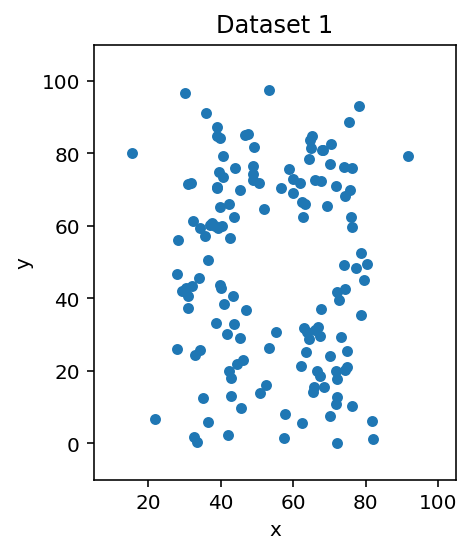

In [4]:
# rerun this cell (e.g. ctrl+enter) to see each dataset visualised
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

i = min(i + 1, 13)
dataset = df[df['dataset'] == i][['x', 'y']]
ax = dataset.plot.scatter('x', 'y')
ax.set_title(f"Dataset {i}")
ax.set_aspect('equal', 'box')
ax.axis([5, 105, -10, 110]);

Remember, the different sets of points above had the exact same summary statistics!